In [1]:
cd ..

/Users/fengcong/Quantum/Graph-CVAE


In [2]:
from dataset import QuantumCircuitDataset

dataset = QuantumCircuitDataset(
    './data/temp',
    base_num_samples=1,
    num_qubits=10,
    max_depth=100,
    regenerate=True,
    topo_types=['grid']
)

Transpile参数组合数：19

=== 开始生成数据集 ===
基础样本数：1 | 拓扑类型：['grid'] | 总样本数：19
比特数：10 | 门类型：['h', 'x', 'cx', 'swap', 'z'] | 最大电路深度：100


原始电路生成进度:   0%|          | 0/1 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:4625: UserWarning: Trying to add QuantumRegister to a QuantumCircuit having a layout
  circ.add_register(qreg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:4625: UserWarning: Trying to add QuantumRegister to a QuantumCircuit having a layout
  circ.add_register(qreg)
原始电路生成进度: 100%|██████████| 1/1 [00:10<00:00, 10.42s/it]


=== 数据集生成完成 ===
成功生成样本数：19/19


In [9]:
len(dataset)

19

In [10]:
dataset[3]

{'g': Data(x=[31, 15], edge_index=[2, 37]),
 't': Data(x=[10, 10], edge_index=[2, 26]),
 'g_star': Data(x=[22, 15], edge_index=[2, 25]),
 'quantum_origin': {'statevector': tensor([0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'unitary': tensor([[0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
          [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
          [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
          ...,
          [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
          [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.3536+0.j, 0.0000+0.j, 0.0000+0.j],
          [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j]])},
 'quantum_optimized': {'statevector': tensor([0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'unitary': tensor([[0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.

## Visualize g, g* (optimzed g), and t.

In [11]:
sample = dataset[1]
g, g_star, t = sample['g'], sample['g_star'], sample['t']

In [12]:
g_star.edge_index

tensor([[ 0,  2,  3,  4,  5,  1,  7,  1,  4,  9,  7, 10,  8, 12,  9, 13, 14, 10,
         15, 11, 17, 14, 18, 13, 19,  6, 20, 15, 22, 16, 23, 23, 25, 22, 24, 26,
         16, 27, 11, 28, 29, 21, 29],
        [ 1,  4,  4,  5,  6,  7,  8,  8,  9, 10, 10, 11, 11, 13, 13, 14, 15, 15,
         16, 16, 18, 18, 19, 20, 20, 21, 21, 22, 23, 23, 24, 25, 26, 26, 27, 27,
         28, 28, 29, 29, 30, 31, 31]])

In [ ]:
from converter import data_to_quantum_circuit

g_qc = data_to_quantum_circuit(g, dataset.num_qubits, dataset.basic_gates)
g_star_qc = data_to_quantum_circuit(g_star, dataset.num_qubits, dataset.basic_gates)

In [ ]:
g_qc.draw()

┌───┐               ┌───┐                                              »
q_0: ┤ Z ├───────■────■──┤ Z ├──────────────────────────────────────────────»
     └───┘       │  ┌─┴─┐├───┤                                              »
q_1: ────────────┼──┤ X ├┤ X ├──────────────────────────────────────────────»
                 │  └───┘└───┘                                              »
q_2: ────────────┼────X──────────────────────■────────────■─────────■───────»
                 │    │  ┌───┐┌───┐          │            │         │       »
q_3: ───────■────┼────┼──┤ Z ├┤ H ├──────────┼────────────┼─────────┼───────»
     ┌───┐┌─┴─┐  │    │  ├───┤└───┘          │            │         │       »
q_4: ┤ X ├┤ X ├──┼────┼──┤ Z ├───────────────┼────────────┼────X────┼───────»
     └───┘└───┘  │    │  └───┘               │          ┌─┴─┐  │    │       »
q_5: ──X─────────┼────┼────■─────────────────┼────────X─┤ X ├──X────┼────■──»
       │  ┌───┐  │    │    │                 │  ┌───┐ │ └───┘       │    │  »
q_6: ──┼──┤ X ├──┼────┼────┼────────X───■────┼──┤ Z ├─┼─────────────┼────┼──»
       │  └───┘  │    │    │  ┌───┐ │   │    │  └───┘ │           ┌─┴─┐  │  »
q_7: ──X─────────┼────X────┼──┤ Z ├─X───┼────┼────────┼───────────┤ X ├──┼──»
     ┌───┐       │       ┌─┴─┐└───┘     │    │        │           └───┘┌─┴─┐»
q_8: ┤ H ├───────┼───────┤ X ├──────────┼────┼────────┼────────────────┤ X ├»
     └───┘     ┌─┴─┐     └───┘        ┌─┴─┐┌─┴─┐      │ ┌───┐┌───┐┌───┐├───┤»
q_9: ──────────┤ X ├──────────────────┤ X ├┤ X ├──────X─┤ X ├┤ H ├┤ X ├┤ X ├»
               └───┘                  └───┘└───┘        └───┘└───┘└───┘└───┘»
«             
«q_0: ──────X─
«           │ 
«q_1: ──────┼─
«           │ 
«q_2: ──────┼─
«           │ 
«q_3: ──────┼─
«           │ 
«q_4: ──■───X─
«     ┌─┴─┐   
«q_5: ┤ X ├───
«     └───┘   
«q_6: ────────
«             
«q_7: ────────
«             
«q_8: ────────
«             
«q_9: ────────
«

In [18]:
g_star_qc.draw()

┌───┐                                                               
q_0: ┤ Z ├─X──────X──────────────────────────────────────────────────────
     └───┘ │      │                                                 ┌───┐
q_1: ──────X──X───X────────X─────────────────────────────────────■──┤ Z ├
     ┌───┐    │      ┌───┐ │                                     │  └───┘
q_2: ┤ Z ├─X──┼───■──┤ Z ├─┼──────────────────────────■──────────┼────■──
     └───┘ │  │ ┌─┴─┐└───┘ │                          │        ┌─┴─┐┌─┴─┐
q_3: ──────┼──X─┤ X ├──X───X───X──────────────────────┼──────X─┤ X ├┤ X ├
     ┌───┐ │    └───┘  │       │                    ┌─┴─┐    │ └───┘└───┘
q_4: ┤ X ├─X──X───■────┼───────┼─────────────────X──┤ X ├────┼───────────
     └───┘    │   │    │       │                 │  ├───┤    │           
q_5: ─────────X───┼────X───X───X────────────■────┼──┤ X ├─X──X───────────
     ┌───┐      ┌─┴─┐      │                │    │  └───┘ │              
q_6: ┤ X ├──────┤ X ├──X───┼───■────────X───┼────X────────┼──────────────
     └───┘      └───┘  │   │   │        │ ┌─┴─┐┌───┐      │              
q_7: ──────────────────X───X───┼────■───┼─┤ X ├┤ Z ├──X───X──────────────
     ┌───┐                   ┌─┴─┐  │   │ └───┘└───┘  │                  
q_8: ┤ H ├───────────────────┤ X ├──┼───X─────────────┼──────────────────
     └───┘                   └───┘┌─┴─┐               │                  
q_9: ─────────────────────────────┤ X ├───────────────X──────────────────
                                  └───┘

In [19]:
sample['optimization_metrics']

{'depth_ratio': 1.1667, 'total_gate_ratio': 1.0968, 'two_qubit_ratio': 1.4375}

In [20]:
sample['meta']

{'base_idx': 0,
 'topo_type': 2,
 'layout_method': 0,
 'routing_method': 0,
 'optimization_level': 2}

In [25]:
origin_um = sample['quantum_origin']['unitary'].numpy()
optimized_um = sample['quantum_optimized']['unitary'].numpy()

In [28]:
optimized_um.shape, origin_um.shape

((1024, 1024), (1024, 1024))

## Visualize topo.

In [29]:
topo_data = sample['t']
topo_data

Data(x=[10, 10], edge_index=[2, 26])

In [33]:
from torch_geometric.utils import to_networkx

topo_g = to_networkx(topo_data, to_undirected=True)
topo_g.number_of_edges(), topo_g.number_of_nodes()

(13, 10)

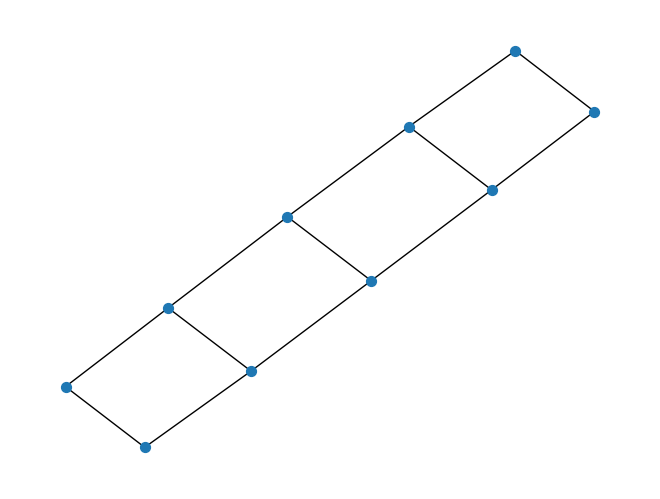

In [36]:
import networkx as nx

nx.draw(topo_g, node_size=50) # 2x5 grid

## Statistic of the dataset.

In [37]:
sample.keys()

dict_keys(['g', 't', 'g_star', 'quantum_origin', 'quantum_optimized', 'optimization_metrics', 'circuit_origin_info', 'circuit_optimized_info', 'meta'])